In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from uco.data_loader import RLEInput, RLEOutput, pivot_df

In [5]:
train_csv = '../data/raw/train.csv'
df = pd.read_csv(train_csv)
df.head()

,Image_Label,EncodedPixels
0,0011165.jpg_Fish,264918 937 266318 937 267718 937 269118 937 27...
1,0011165.jpg_Flower,1355565 1002 1356965 1002 1358365 1002 1359765...
2,0011165.jpg_Gravel,NaN
3,0011165.jpg_Sugar,NaN
4,002be4f.jpg_Fish,233813 878 235213 878 236613 878 238010 881 23...


In [7]:
df = pivot_df(df)
df.head()

,rle0,rle1,rle2,rle3,n_classes,c0,c1,c2,c3
Image,,,,,,,,,
0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,1355565 1002 1356965 1002 1358365 1002 1359765...,NaN,NaN,2,True,True,False,False
002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,1339279 519 1340679 519 1342079 519 1343479 51...,NaN,67495 350 68895 350 70295 350 71695 350 73095 ...,3,True,True,False,True
0031ae9.jpg,3510 690 4910 690 6310 690 7710 690 9110 690 1...,2047 703 3447 703 4847 703 6247 703 7647 703 9...,NaN,658170 388 659570 388 660970 388 662370 388 66...,3,True,True,False,True
0035239.jpg,NaN,100812 462 102212 462 103612 462 105012 462 10...,65400 380 66800 380 68200 380 69600 380 71000 ...,NaN,2,False,True,True,False
003994e.jpg,2367966 18 2367985 2 2367993 8 2368002 62 2369...,NaN,353317 416 354717 416 356117 416 357517 416 35...,28011 489 29411 489 30811 489 32211 489 33611 ...,3,True,False,True,True


In [8]:
counts = {c: df[f'c{c}'].sum() for c in range(4)}
counts

{0: 2781, 1: 2365, 2: 2939, 3: 3751}

In [9]:
sorted_classes = sorted(counts.items(), key=lambda kv: kv[1])
sorted_classes

[(1, 2365), (0, 2781), (2, 2939), (3, 3751)]

In [14]:
def pixel_count(s):
    if not isinstance(s, str):
        return 0
    mask = RLEInput.from_str(s).to_mask()
    return mask.sum()

def contains_defect(s):
    return isinstance(s, str)

In [15]:
df.iloc[:, 4]

Image
0011165.jpg    2
002be4f.jpg    3
0031ae9.jpg    3
0035239.jpg    2
003994e.jpg    3
              ..
ffcedf2.jpg    1
ffd11b6.jpg    2
ffd3dfb.jpg    1
ffd6680.jpg    2
ffea4f4.jpg    1
Name: n_classes, Length: 5546, dtype: int64

In [16]:
df['c0'] = df.iloc[:, 0].apply(contains_defect)
df['c1'] = df.iloc[:, 1].apply(contains_defect)
df['c2'] = df.iloc[:, 2].apply(contains_defect)
df['c3'] = df.iloc[:, 3].apply(contains_defect)

In [17]:
df['px0'] = df.iloc[:, 0].apply(pixel_count)
df['px1'] = df.iloc[:, 1].apply(pixel_count)
df['px2'] = df.iloc[:, 2].apply(pixel_count)
df['px3'] = df.iloc[:, 3].apply(pixel_count)
df.head(25)

,rle0,rle1,rle2,rle3,n_classes,c0,c1,c2,c3,px0,px1,px2,px3
Image,,,,,,,,,,,,,
0011165.jpg,264918 937 266318 937 267718 937 269118 937 27...,1355565 1002 1356965 1002 1358365 1002 1359765...,NaN,NaN,2,True,True,False,False,932312,1156107,0,0
002be4f.jpg,233813 878 235213 878 236613 878 238010 881 23...,1339279 519 1340679 519 1342079 519 1343479 51...,NaN,67495 350 68895 350 70295 350 71695 350 73095 ...,3,True,True,False,True,1684325,592697,0,313950
0031ae9.jpg,3510 690 4910 690 6310 690 7710 690 9110 690 1...,2047 703 3447 703 4847 703 6247 703 7647 703 9...,NaN,658170 388 659570 388 660970 388 662370 388 66...,3,True,True,False,True,1240822,1178858,0,306908
0035239.jpg,NaN,100812 462 102212 462 103612 462 105012 462 10...,65400 380 66800 380 68200 380 69600 380 71000 ...,NaN,2,False,True,True,False,0,655989,289939,0
003994e.jpg,2367966 18 2367985 2 2367993 8 2368002 62 2369...,NaN,353317 416 354717 416 356117 416 357517 416 35...,28011 489 29411 489 30811 489 32211 489 33611 ...,3,True,False,True,True,183231,0,410592,216627
00498ec.jpg,NaN,NaN,326420 552 327820 552 329220 552 330620 552 33...,NaN,1,False,False,True,False,0,0,203030,0
006bf7c.jpg,43614 529 45014 529 46414 529 47814 529 49214 ...,NaN,NaN,4221 185 5621 185 7021 185 8421 185 9821 185 1...,2,True,False,False,True,701799,0,0,217745
006c5a6.jpg,916291 381 917691 381 919091 381 920491 381 92...,NaN,NaN,80340 698 81041 4 81046 3 81050 2 81057 2 8106...,2,True,False,False,True,784836,0,0,1731623
008233e.jpg,NaN,NaN,NaN,910449 829 911849 829 913249 829 914649 829 91...,1,False,False,False,True,0,0,0,947560


In [37]:
H = RLEInput.MASK_H
W = RLEInput.MASK_W
N_Input = H * W
N_Input

2940000

In [40]:
H = RLEOutput.MASK_H
W = RLEOutput.MASK_W
N_Output = H * W
N_Output

183750

In [43]:
scale_output = N_Input / N_Output
scale_output

16.0

In [48]:
df.loc[df.px0 != 0, 'px0'].quantile(0.02) / scale_output

9573.1375

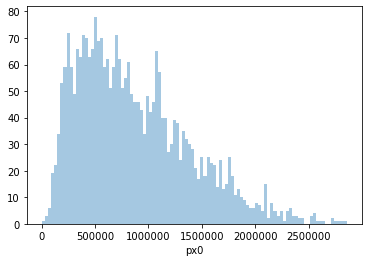

In [19]:
sns.distplot(df.loc[df.px0 != 0, 'px0'], bins=100, kde=False)

In [49]:
df.loc[df.px1 != 0, 'px1'].quantile(0.02) / scale_output

9670.0275

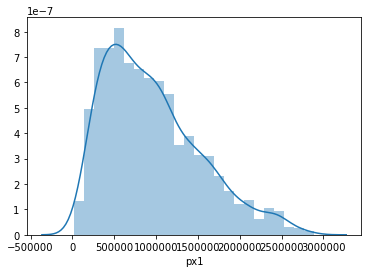

In [21]:
sns.distplot(df.loc[df.px1 != 0, 'px1'])

In [50]:
df.loc[df.px2 != 0, 'px2'].quantile(0.02) / scale_output

9019.9175

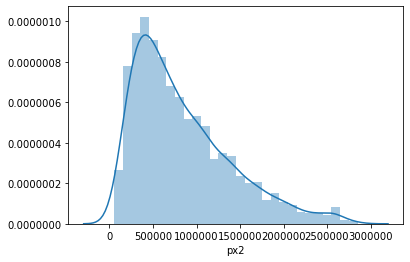

In [23]:
sns.distplot(df.loc[df.px2 != 0, 'px2'])

In [51]:
df.loc[df.px3 != 0, 'px3'].quantile(0.02) / scale_output

7885.75

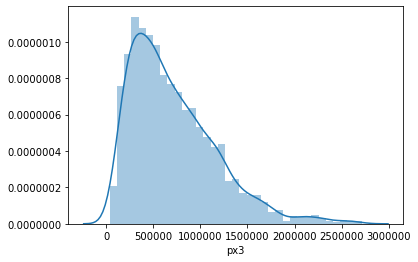

In [25]:
sns.distplot(df.loc[df.px3 != 0, 'px3'])

In [26]:
print(df.c1.mean(), df.c2.mean(), df.c3.mean(), df.c4.mean())

AttributeError: 'DataFrame' object has no attribute 'c4'

In [ ]:
df.groupby(['c1', 'c2', 'c3', 'c4'])['defects'].count()

In [ ]:
df.c3.mean()

In [ ]:
df_empty.empty

In [ ]:
df_nodef = df.loc[df.defects > 0, :]
df_nodef.shape